   Fertilizante (kg)  Papas (toneladas)
0          37.454012          38.398445
1          95.071431          82.562108
2          73.199394          67.018319
3          59.865848          45.954834
4          15.601864          19.383132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fertilizante (kg)  100 non-null    float64
 1   Papas (toneladas)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
       Fertilizante (kg)  Papas (toneladas)
count         100.000000         100.000000
mean           47.018074          45.609058
std            29.748941          23.551725
min             0.552212           7.021062
25%            19.320076          25.530132
50%            46.414245          43.010391
75%            73.020312          66.480708
max            98.688694          90.860069
    Fertilizante (kg)  P

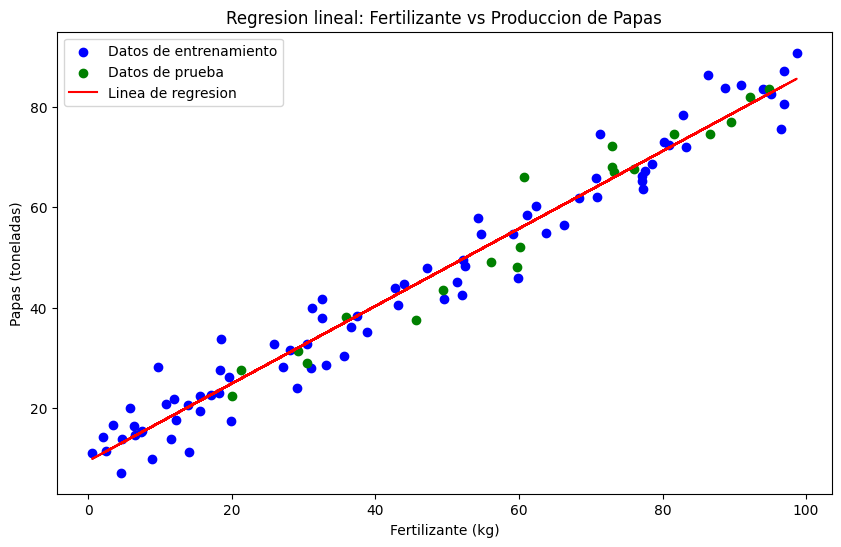

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#Crear datos ficticios
n = 100 #Numero de muestras

#Generar valores para la cantidad de fertilizante (x) en un rango de 0 a 100 Kg
np.random.seed(42) #Reproductibilidad
fertilizante = np.random.uniform(0, 100, n)

#Definir una relación lineal con ruido aleatorio para la cantidad de papas (Y)
#Suponemos que por cada 1 kg de fertilizante obtenemos 0.8 toneladas de papas
#Y agregamos un poco de ruido nortmal para simular variedad natural
papas = 0.8 * fertilizante + np.random.normal(0, 5, n) + 8 #Interseccion Y donde X = 0

#Creamos nuestro conjunto de datos sintetico para trabajar (dataframe)
df = pd.DataFrame({
'Fertilizante (kg)':fertilizante,
'Papas (toneladas)': papas
})

#Asignamos los datos a sus correspondientes variables
x = df [['Fertilizante (kg)']].values
y = df ['Papas (toneladas)'].values

#OPCIONAL PODEMOS VER EL DATAFRAME QUE HEMOS HECHO
print(df.head()) #Muestra las primeras filas del dataframe
print(df.info()) #Muestra información de las columnas y los tipos de datos
print(df.describe()) #Muestra estadísticas descriptivas para las columnas
print(df)
# show(df) #Muestra la tabla completa del dataframe con las 100 muestras

#Separar los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Definir modelo y entrenarlo
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#Hacer prediccion
y_pred = regressor.predict(x_test)

# Calcular b0 y b1
b1 = regressor.coef_[0]
b0 = regressor.intercept_

print(f"""
    b1: {b1}
    b0: {b0}
""")

# Calcular MSE (Error cuadrático medio), RMSE(Raiz del MSE), R^2 (Coeficiente de determinación de R^2)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"""
    mse: {mse}
    rmse: {rmse}
    r2: {r2}
""")

#Crear la figura para poder visualizar
plt.figure(figsize=(10,6))

#Scatter plot del set de entramiento
plt.scatter(x_train, y_train, color="blue", label="Datos de entrenamiento")

#Scatter plot del set de prueba
plt.scatter(x_test, y_test, color="green", label="Datos de prueba")

#Linea de regresion calculada
plt.plot(x_train, regressor.predict(x_train), color="red", label="Linea de regresion")

#Ponemos un titulo a la grafica
plt.title("Regresion lineal: Fertilizante vs Produccion de Papas")
plt.xlabel("Fertilizante (kg)")
plt.ylabel("Papas (toneladas)")
plt.legend()

#OPCIONAL SI QUEREMOS VER EL GRAFICO
plt.show()